In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('features/91app_features.txt')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', 40)

In [4]:
pd.set_option('display.max_rows', 100)

In [6]:
df.describe()

,online_ratio,total_day_using_percentage,actually_using_percentage,view_per_date,total_conversion_rate,off_cart_c,off_fav_c,off_view_c,on_cart_c,on_fav_c,on_view_c,total_cart_c,total_fav_c,total_view_c,viewtime_ave,view_time_med,201803F,201804F,201805F,201806F,...,201902F,201903F,201904F,201803M,201804M,201805M,201806M,201807M,201808M,201809M,201810M,201811M,201812M,201901M,201902M,201903M,201904M,total_F,total_M,total_discount_percentage
count,48803.000000,76401.000000,76401.000000,76401.000000,76401.000000,8317.000000,7367.000000,23757.000000,16283.000000,7168.000000,16500.000000,20691.000000,12510.000000,33983.000000,69452.000000,69452.000000,76401.000000,76401.000000,76401.000000,76401.000000,...,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,48792.000000
mean,0.248956,0.090230,0.311270,5.856662,0.301787,0.127946,0.078662,0.046197,0.632877,0.197247,0.155050,0.484761,0.134012,0.087240,62.163306,47.171599,0.105588,0.154474,0.182628,0.184801,...,0.143257,0.151412,0.169239,315.004673,414.941074,507.007709,473.530137,546.165980,417.892305,396.815722,564.964987,659.906415,615.157393,617.377914,424.548147,409.644638,461.362809,2.377024,6824.319904,0.052758
std,0.398780,0.130388,0.353234,6.056125,0.857839,0.264459,0.197630,0.119654,0.306363,0.288673,0.219498,0.356269,0.246800,0.167359,64.279251,58.059515,0.479955,0.618465,0.681609,0.680524,...,0.524767,0.575713,0.588833,1650.760700,1987.893322,2232.392599,2117.984120,2059.601015,1841.737740,1849.489309,2642.060689,2746.361930,2635.102124,2639.822934,1884.723905,1804.951821,1891.038357,4.954765,16145.459095,0.069008
min,0.000000,0.002370,0.004988,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,-6600.000000,-900.000000,-200.000000,-880.000000,-6300.000000,-2760.000000,-100.000000,-100.000000,-200.000000,0.000000,0.000000,0.000000
25%,0.000000,0.013333,0.060606,2.346154,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.035700,0.173833,0.000000,0.000000,33.393010,26.125000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007971
50%,0.000000,0.039474,0.137931,4.283186,0.047619,0.000000,0.000000,0.000000,0.625000,0.064500,0.076300,0.500000,0.000000,0.032300,48.111359,36.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2060.000000,0.033930
75%,0.500000,0.108696,0.408537,7.280000,0.250000,0.125000,0.040440,0.042200,1.000000,0.271787,0.166700,0.791675,0.166650,0.090900,70.250000,50.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6900.000000,0.067568
max,1.000000,1.000000,1.000000,221.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1773.000000,1773.000000,19.000000,21.000000,35.000000,22.000000,...,11.000000,19.000000,16.000000,65870.000000,166320.000000,100130.000000,120590.000000,95830.000000,97300.000000,98380.000000,265710.000000,118520.000000,91180.000000,123240.000000,51840.000000,48240.000000,59160.000000,219.000000,857190.000000,0.920245


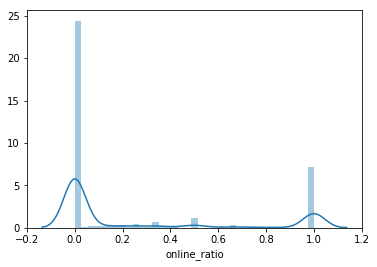

In [7]:
sns.distplot(df['online_ratio'].dropna())

約3/4 全部線下購買  1/4全部線上購買 只有少數佔一半一半

34169 個offline buyer, online_ratio<=0.2

In [8]:
def is_offline_buyer(row):
    if row['online_ratio'] <= 0.2:
        val = 1
    elif row['online_ratio'] > 0.2:
        val = 0
    else:
        val = 'not a buyer'
    return val

In [9]:
df['offline_buyer'] = df.apply(is_offline_buyer, axis=1)

In [10]:
df

,memberid,online_ratio,total_day_using_percentage,actually_using_percentage,view_per_date,total_conversion_rate,off_cart_c,off_fav_c,off_view_c,on_cart_c,on_fav_c,on_view_c,total_cart_c,total_fav_c,total_view_c,viewtime_ave,view_time_med,201803F,201804F,201805F,...,201903F,201904F,201803M,201804M,201805M,201806M,201807M,201808M,201809M,201810M,201811M,201812M,201901M,201902M,201903M,201904M,total_F,total_M,total_discount_percentage,offline_buyer
0,23722,NaN,0.002849,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
1,44751,NaN,0.022923,0.026846,3.875000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.376190,50.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
2,66732,NaN,0.027160,0.108911,4.363636,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.985833,27.325000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
3,108059,NaN,0.003058,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,12.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
4,257559,NaN,0.006061,0.250000,1.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,22.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
5,314792,NaN,0.006116,0.016529,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
6,394660,NaN,0.012019,0.016129,1.600000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,37.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
7,437828,NaN,0.002770,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
8,439730,NaN,0.002817,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.000000,46.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
9,519517,NaN,0.002488,1.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.333333,43.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer


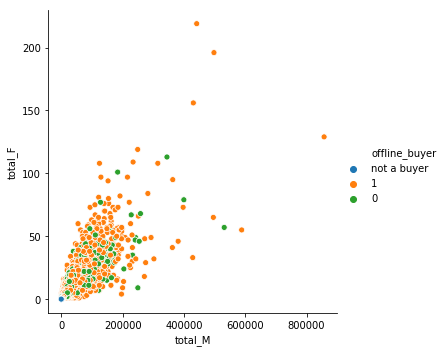

In [11]:
sns.relplot(x="total_M", y="total_F", hue ="offline_buyer",data=df)

看要怎麼切 

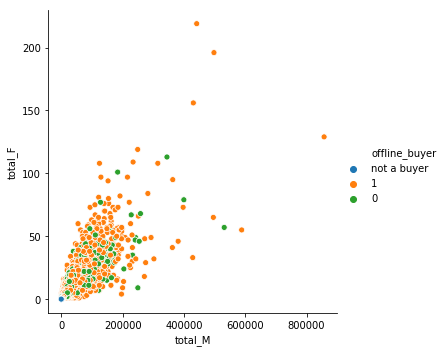

In [12]:
sns.relplot(x="total_M", y="total_F", hue ="offline_buyer",data=df)

In [13]:
total_M_less_than_200k = df.loc[df["total_M"]<200000]

In [14]:
total_M_less_than_200k

,memberid,online_ratio,total_day_using_percentage,actually_using_percentage,view_per_date,total_conversion_rate,off_cart_c,off_fav_c,off_view_c,on_cart_c,on_fav_c,on_view_c,total_cart_c,total_fav_c,total_view_c,viewtime_ave,view_time_med,201803F,201804F,201805F,...,201903F,201904F,201803M,201804M,201805M,201806M,201807M,201808M,201809M,201810M,201811M,201812M,201901M,201902M,201903M,201904M,total_F,total_M,total_discount_percentage,offline_buyer
0,23722,NaN,0.002849,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
1,44751,NaN,0.022923,0.026846,3.875000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.376190,50.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
2,66732,NaN,0.027160,0.108911,4.363636,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.985833,27.325000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
3,108059,NaN,0.003058,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,12.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
4,257559,NaN,0.006061,0.250000,1.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,22.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
5,314792,NaN,0.006116,0.016529,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
6,394660,NaN,0.012019,0.016129,1.600000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,37.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
7,437828,NaN,0.002770,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
8,439730,NaN,0.002817,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.000000,46.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
9,519517,NaN,0.002488,1.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.333333,43.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer


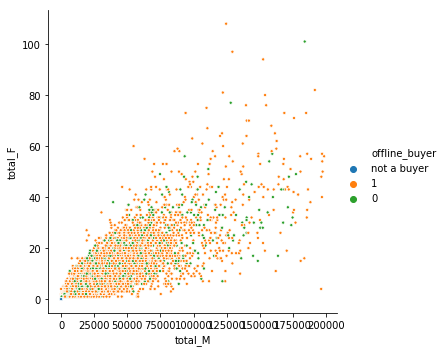

In [15]:
sns.relplot(x="total_M", y="total_F", hue ="offline_buyer",data=total_M_less_than_200k,s=10)

好像還是沒有特別明顯的分區 但可以看出offline f跟m比較高一點

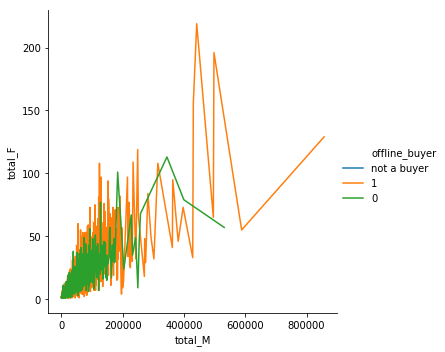

In [16]:
sns.relplot(x="total_M", y="total_F", hue ="offline_buyer",data=df,
            kind="line")

In [30]:
#活躍度
def activityRate(row):
    # total_day_using_percentage : recency, actually_using_percentage and view_per_date : frequency
    #看要怎麼計算活躍度 
    return np.log(row['total_day_using_percentage'])+np.log10(row['actually_using_percentage'])+np.log10(row['view_per_date'])


In [31]:
df['activity'] = df.apply(activityRate, axis=1)

In [32]:
df

,memberid,online_ratio,total_day_using_percentage,actually_using_percentage,view_per_date,total_conversion_rate,off_cart_c,off_fav_c,off_view_c,on_cart_c,on_fav_c,on_view_c,total_cart_c,total_fav_c,total_view_c,viewtime_ave,view_time_med,201803F,201804F,201805F,...,201904F,201803M,201804M,201805M,201806M,201807M,201808M,201809M,201810M,201811M,201812M,201901M,201902M,201903M,201904M,total_F,total_M,total_discount_percentage,offline_buyer,activity
0,23722,NaN,0.002849,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer,-5.860786
1,44751,NaN,0.022923,0.026846,3.875000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.376190,50.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer,-4.758485
2,66732,NaN,0.027160,0.108911,4.363636,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.985833,27.325000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer,-3.929072
3,108059,NaN,0.003058,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,12.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer,-5.488930
4,257559,NaN,0.006061,0.250000,1.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,22.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer,-5.531914
5,314792,NaN,0.006116,0.016529,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer,-6.878568
6,394660,NaN,0.012019,0.016129,1.600000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,37.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer,-6.009519
7,437828,NaN,0.002770,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer,-5.888878
8,439730,NaN,0.002817,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.000000,46.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer,-5.394997
9,519517,NaN,0.002488,1.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.333333,43.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer,-5.394392


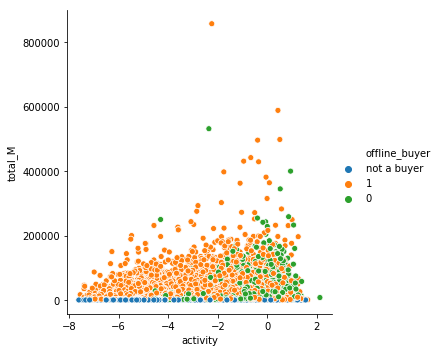

In [48]:
sns.relplot(x="activity", y="total_M", hue ="offline_buyer",data=df)

activity越高，好像金額也越多

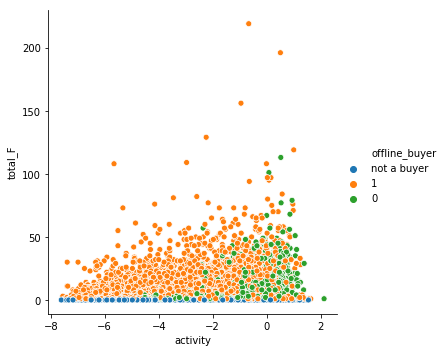

In [34]:
sns.relplot(x="activity", y="total_F", hue ="offline_buyer",data=df)

actitiy 越高 frequency也越多

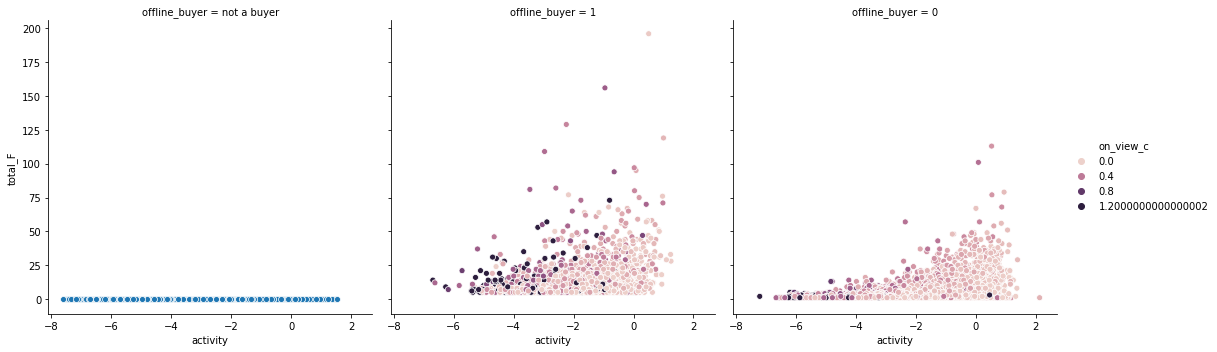

In [38]:
sns.relplot(x="activity", y="total_F", hue ="on_view_c",col="offline_buyer",data=df)

好像沒啥用 是廢畫 本來看比較少的購買者 就只會買、看一兩種商品

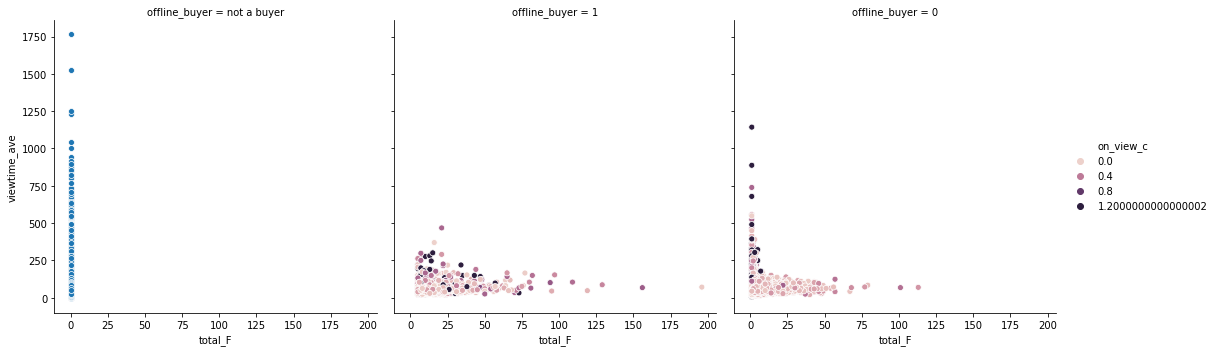

In [42]:
# y為session停留時間

sns.relplot(x="total_F", y="viewtime_ave", hue ="on_view_c",col="offline_buyer",data=df)

session停留時間越長，view轉換率越高??

In [ ]:
sns.relplot(x="total_F", y="viewtime_ave", hue ="on_view_c",col="offline_buyer",data=df)

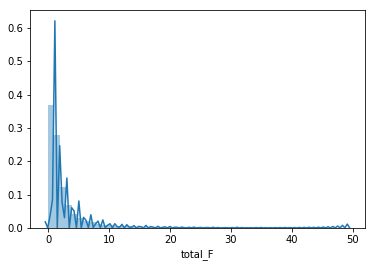

In [46]:
#有一小部分在total_F>200，頻繁購買者
sns.distplot(df.loc[df["total_F"]<50]['total_F'].dropna())

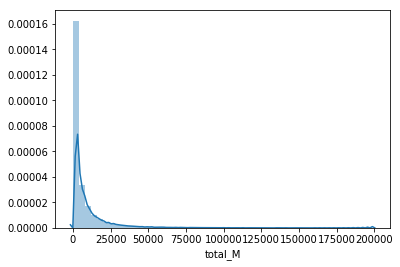

In [45]:
#有少數的total M在八十萬左右 大客戶
sns.distplot(df.loc[df["total_M"]<200000]['total_M'].dropna())

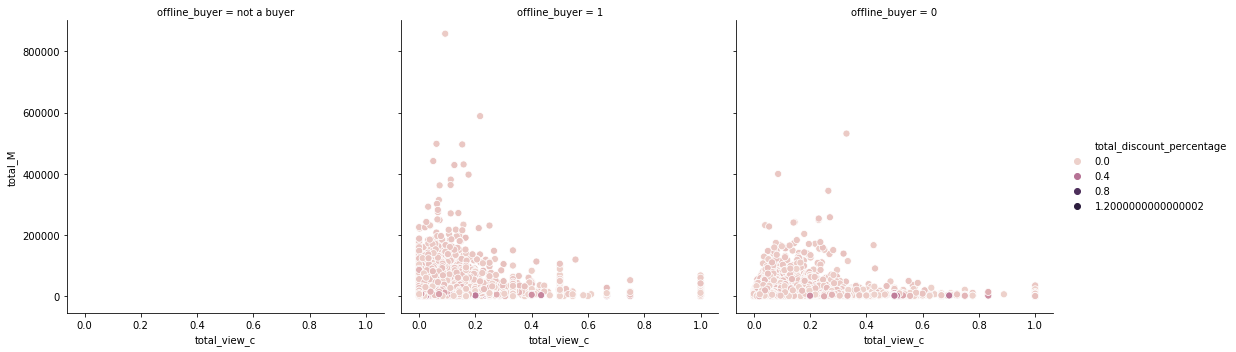

In [54]:
#隨便畫
sns.relplot(x="total_view_c", y="total_M", hue ="total_discount_percentage",col="offline_buyer",data=df,s=50)

In [ ]:
sns.relplot(x="total_view_c", y="total_M", hue ="total_discount_percentage",col="offline_buyer",data=df,s=50)

# 現在開始第二種方式

In [55]:
df2 = pd.read_csv('features/91app_features.txt')

In [63]:
def online_offline_buyer(row):
    #數值0代表線下購買者，1代表兩者之間,2代表獻上購買者
    if row['online_ratio'] <= 0.2:
        val = "mostly offline buyer"
    elif row['online_ratio'] > 0.2 and row['online_ratio'] <=0.8:
        val = "online and offline buyer"
    elif row['online_ratio'] > 0.8:
        val = "mostly online buyer"
    else:
        return "not a buyer"
    return val

In [64]:
def activityRate(row):
    # total_day_using_percentage : 瀏覽recency, actually_using_percentage and view_per_date : 瀏覽frequency
    #看要怎麼計算活躍度 
    return np.log(row['total_day_using_percentage'])+np.log10(row['actually_using_percentage'])+np.log10(row['view_per_date'])


In [65]:
df2['online_or_offline'] = df2.apply(online_offline_buyer, axis=1)

In [66]:
df2['activity'] = df2.apply(activityRate, axis=1)

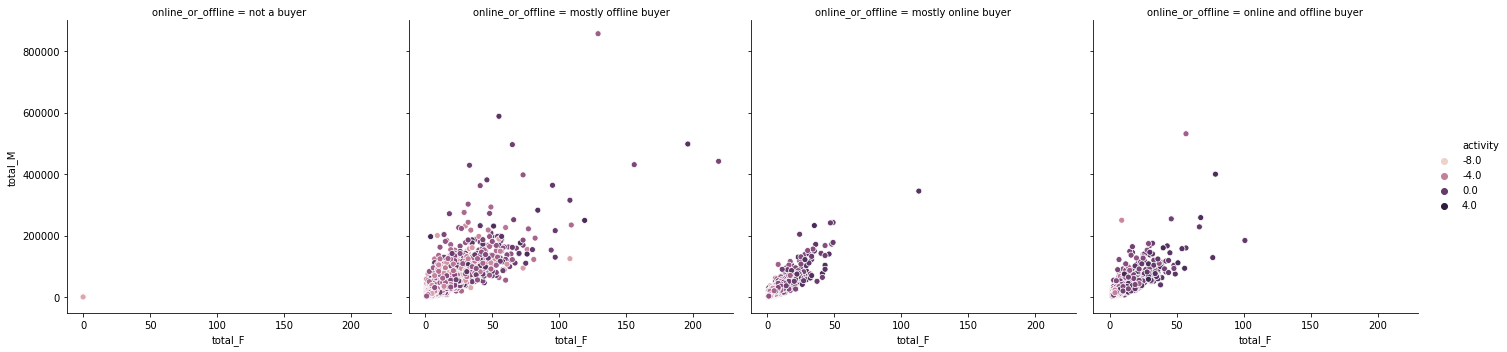

In [67]:
sns.relplot(x="total_F", y="total_M", hue ="activity",col="online_or_offline",data=df2)

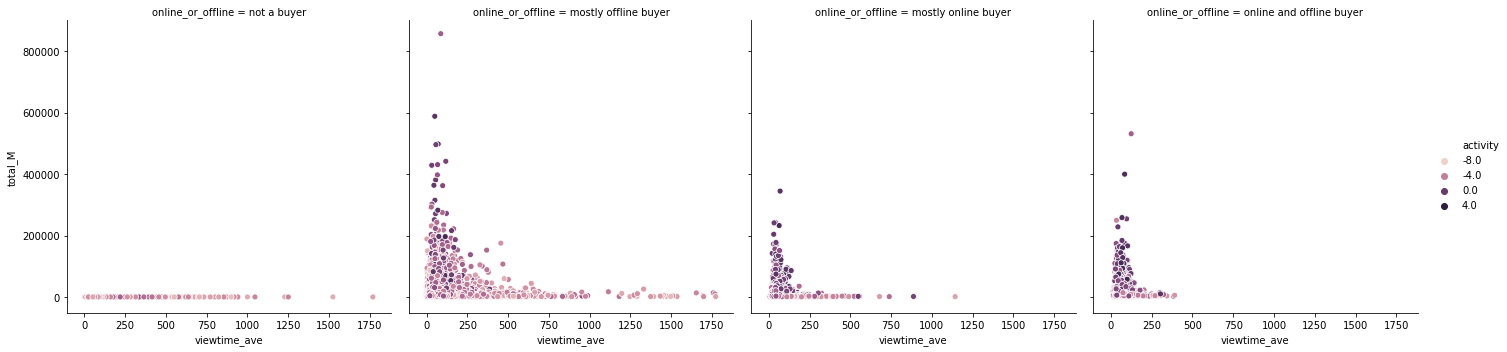

In [70]:
sns.relplot(x="viewtime_ave", y="total_M", hue ="activity",col="online_or_offline",data=df2)

越傾向offline, avg viewtime好像比較長一點

In [ ]:
sns.relplot(x="viewtime_ave", y="total_M", hue ="activity",col="online_or_offline",data=df2)

In [71]:
df2.describe()

,online_ratio,total_day_using_percentage,actually_using_percentage,view_per_date,total_conversion_rate,off_cart_c,off_fav_c,off_view_c,on_cart_c,on_fav_c,on_view_c,total_cart_c,total_fav_c,total_view_c,viewtime_ave,view_time_med,201803F,201804F,201805F,201806F,...,201903F,201904F,201803M,201804M,201805M,201806M,201807M,201808M,201809M,201810M,201811M,201812M,201901M,201902M,201903M,201904M,total_F,total_M,total_discount_percentage,activity
count,48803.000000,76401.000000,76401.000000,76401.000000,76401.000000,8317.000000,7367.000000,23757.000000,16283.000000,7168.000000,16500.000000,20691.000000,12510.000000,33983.000000,69452.000000,69452.000000,76401.000000,76401.000000,76401.000000,76401.000000,...,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,48792.000000,76401.000000
mean,0.248956,0.090230,0.311270,5.856662,0.301787,0.127946,0.078662,0.046197,0.632877,0.197247,0.155050,0.484761,0.134012,0.087240,62.163306,47.171599,0.105588,0.154474,0.182628,0.184801,...,0.151412,0.169239,315.004673,414.941074,507.007709,473.530137,546.165980,417.892305,396.815722,564.964987,659.906415,615.157393,617.377914,424.548147,409.644638,461.362809,2.377024,6824.319904,0.052758,-3.456694
std,0.398780,0.130388,0.353234,6.056125,0.857839,0.264459,0.197630,0.119654,0.306363,0.288673,0.219498,0.356269,0.246800,0.167359,64.279251,58.059515,0.479955,0.618465,0.681609,0.680524,...,0.575713,0.588833,1650.760700,1987.893322,2232.392599,2117.984120,2059.601015,1841.737740,1849.489309,2642.060689,2746.361930,2635.102124,2639.822934,1884.723905,1804.951821,1891.038357,4.954765,16145.459095,0.069008,1.611941
min,0.000000,0.002370,0.004988,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,-6600.000000,-900.000000,-200.000000,-880.000000,-6300.000000,-2760.000000,-100.000000,-100.000000,-200.000000,0.000000,0.000000,0.000000,-7.610749
25%,0.000000,0.013333,0.060606,2.346154,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.035700,0.173833,0.000000,0.000000,33.393010,26.125000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007971,-4.710416
50%,0.000000,0.039474,0.137931,4.283186,0.047619,0.000000,0.000000,0.000000,0.625000,0.064500,0.076300,0.500000,0.000000,0.032300,48.111359,36.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2060.000000,0.033930,-3.564848
75%,0.500000,0.108696,0.408537,7.280000,0.250000,0.125000,0.040440,0.042200,1.000000,0.271787,0.166700,0.791675,0.166650,0.090900,70.250000,50.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6900.000000,0.067568,-2.300962
max,1.000000,1.000000,1.000000,221.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1773.000000,1773.000000,19.000000,21.000000,35.000000,22.000000,...,19.000000,16.000000,65870.000000,166320.000000,100130.000000,120590.000000,95830.000000,97300.000000,98380.000000,265710.000000,118520.000000,91180.000000,123240.000000,51840.000000,48240.000000,59160.000000,219.000000,857190.000000,0.920245,2.123852


In [83]:
def think_hard_or_briefing(row):
    if row['viewtime_ave'] <= 30:
        val = "Briefing user"
    elif row['viewtime_ave'] > 30 and row['viewtime_ave'] <= 120:
        val = "General user"
    elif row['viewtime_ave'] > 120:
        val = "Thinking hard user"
    else:
        return "not a watcher"
    return val

In [84]:
df2['watching_behavior'] = df2.apply(think_hard_or_briefing, axis=1)

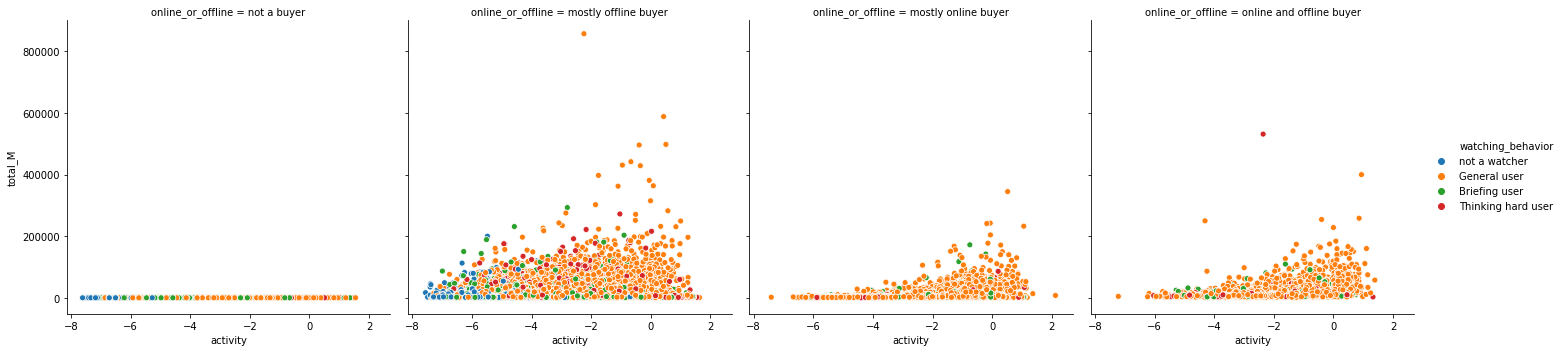

In [85]:
sns.relplot(x="activity", y="total_M", hue ="watching_behavior",col="online_or_offline",data=df2)

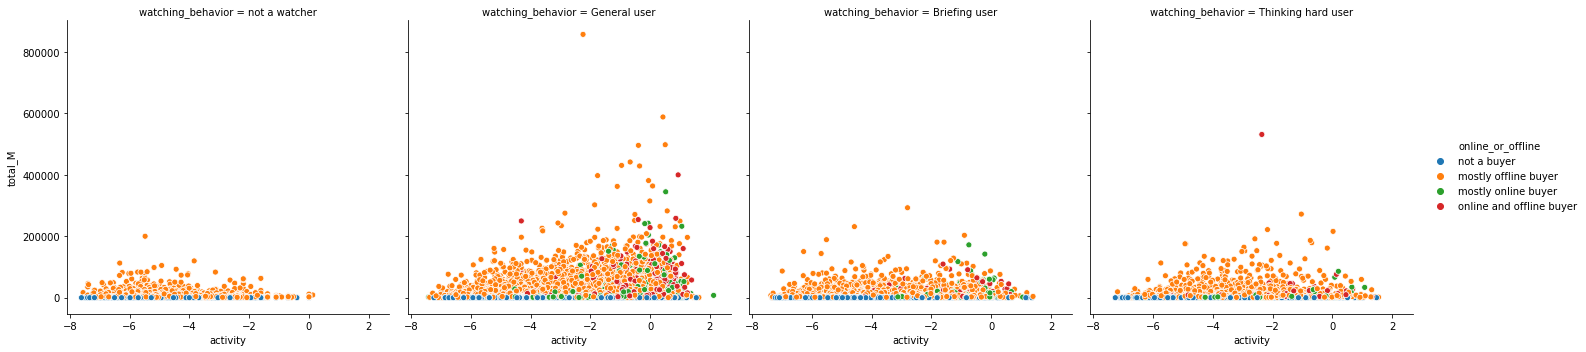

In [86]:
sns.relplot(x="activity", y="total_M", hue ="online_or_offline",col="watching_behavior",data=df2)

# 把沒購買的人都去掉的情況

In [100]:
df_buyer = df_buyer.loc[df_buyer['total_F']>0]

In [101]:
df_buyer.describe()

,online_ratio,total_day_using_percentage,actually_using_percentage,view_per_date,total_conversion_rate,off_cart_c,off_fav_c,off_view_c,on_cart_c,on_fav_c,on_view_c,total_cart_c,total_fav_c,total_view_c,viewtime_ave,view_time_med,201803F,201804F,201805F,201806F,...,201903F,201904F,201803M,201804M,201805M,201806M,201807M,201808M,201809M,201810M,201811M,201812M,201901M,201902M,201903M,201904M,total_F,total_M,total_discount_percentage,activity
count,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,8317.000000,7367.000000,23757.000000,16283.000000,7168.000000,16500.000000,20691.000000,12510.000000,33983.000000,44796.000000,44796.000000,48803.000000,48803.000000,48803.000000,48803.000000,...,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48792.000000,48803.000000
mean,0.248956,0.113392,0.296886,5.810959,0.472446,0.127946,0.078662,0.046197,0.632877,0.197247,0.155050,0.484761,0.134012,0.087240,63.998876,47.194729,0.165297,0.241829,0.285905,0.289306,...,0.237035,0.264943,493.139192,649.589431,793.719566,741.310493,855.021761,654.209577,621.214229,884.451571,1033.082188,963.027683,966.503903,664.629285,641.297871,722.262566,3.721226,10683.459316,0.052758,-3.135586
std,0.398780,0.146657,0.328931,5.550281,1.035089,0.264459,0.197630,0.119654,0.306363,0.288673,0.219498,0.356269,0.246800,0.167359,65.529236,59.402446,0.592246,0.760052,0.835341,0.833530,...,0.706106,0.719336,2044.060621,2456.425696,2752.138036,2612.305374,2525.220702,2270.594884,2283.768055,3262.734997,3379.694235,3245.845413,3251.472539,2324.093431,2225.227045,2325.910830,5.781920,19153.609155,0.069008,1.636782
min,0.000000,0.002375,0.004988,1.000000,0.000894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,-6600.000000,-900.000000,-200.000000,-880.000000,-6300.000000,-2760.000000,-100.000000,-100.000000,-200.000000,1.000000,0.000000,0.000000,-7.555974
25%,0.000000,0.019231,0.067126,2.475205,0.055556,0.000000,0.000000,0.000000,0.375000,0.000000,0.035700,0.173833,0.000000,0.000000,35.399782,26.687500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2260.000000,0.007971,-4.406403
50%,0.000000,0.056000,0.149485,4.433962,0.163265,0.000000,0.000000,0.000000,0.625000,0.064500,0.076300,0.500000,0.000000,0.032300,50.130411,36.225000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4740.000000,0.033930,-3.171016
75%,0.500000,0.147343,0.373494,7.375000,0.500000,0.125000,0.040440,0.042200,1.000000,0.271787,0.166700,0.791675,0.166650,0.090900,72.066572,50.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,11380.000000,0.067568,-1.909235
max,1.000000,1.000000,1.000000,170.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1773.000000,1773.000000,19.000000,21.000000,35.000000,22.000000,...,19.000000,16.000000,65870.000000,166320.000000,100130.000000,120590.000000,95830.000000,97300.000000,98380.000000,265710.000000,118520.000000,91180.000000,123240.000000,51840.000000,48240.000000,59160.000000,219.000000,857190.000000,0.920245,2.123852


In [97]:
df_buyer['total_F'].describe()

count    48803.000000
mean         3.721226
std          5.781920
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        219.000000
Name: total_F, dtype: float64

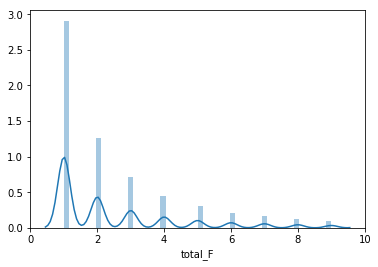

In [105]:
sns.distplot(df_buyer.loc[df_buyer['total_F']<10]['total_F'])